**ENERGY CONSUMPTION AND PREDICTION PROJECT**

**Step1: DataExplorations**

**Problem Statement**

**Develop a predicative model to forecast the energy consumption of households based on historical power consumption data,conditions,and demographic information.The goal of the project is to model the energy consumption of various sites and predict consumption peaks.**

In [61]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [62]:
#Loading the dataset
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-62-eacb29f10324>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


**The meaning of each attribute in the dataset:**

**Datetime:**Timestamp of the recorded energy consumption providing a temporal context for analysis

**Global_active_power:**Total active power consumed by the household (in kilowatts), indicating overall energy usage.

**Global_reactive_power**: Reactive power (in kilovars) that supports the voltage levels required for the active power to do useful work.

**Voltage:**The electrical potential difference (in volts) of the power supply, influencing how efficiently energy is consumed.

**Global_intensity:** Measure of current (in amperes) flowing in the household, reflecting the demand for electricity.

**Sub_metering_1**: Energy consumption (in watt-hours) for a specific appliance or area, helping to break down overall usage.

**Sub_metering_2**: Energy consumption (in watt-hours) for another appliance or area, providing additional detail on energy distribution.

**Sub_metering_3**: Energy consumption (in watt-hours) for a third appliance or area, allowing for further granularity in energy tracking.





In [63]:
#Inspecting the Dataset
df.head()#gives first five rows

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [64]:
df.tail() #gives last five rows

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [65]:
df.describe() #gives description about the data

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [67]:
df.shape #shoes no of rows and no of columns

(2075259, 9)

In [68]:
df.describe(include=object) #displays the object columns

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


In [69]:
df.nunique() #returns the number of unique values in each column

,0
Date,1442
Time,1440
Global_active_power,6534
Global_reactive_power,896
Voltage,5168
Global_intensity,377
Sub_metering_1,153
Sub_metering_2,145
Sub_metering_3,32


In [70]:
df.info() #gives a summary of the dataset, including column names, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


**Data preprocessing**

In [71]:
#converting columns to numeric
cols_convert = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
for col in cols_convert:
  df[col] = pd.to_numeric(df[col],errors = 'coerce')

*Columns that you want to convert into numeric data types in your DataFrame (df) are listed in the cols_convert list.*


*   For loop: The loop goes through each column in the cols_convert list one by one.
*   pd.to_numeric(): This pandas function attempts to convert the values in each column to a numeric data type (integer or float).
*   df[col]: This selects the column col from the DataFrame df.
If an error arises during the conversion of non-numeric values into numbers, these very values will become a NaN as flags on proper completion instead of causing an error.


In [72]:
#Creating a data column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = '%d/%m/%Y %H:%M:%S')
df.drop(['Date','Time'] , axis = 1, inplace = True)

In [73]:
print(df.columns)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime'],
      dtype='object')


In [74]:
print(df)

         Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0                    18.4             0.0             1.0            17.0   
1                    23.0             0.0             1.0            16.0   


Combine Date and Time columns into one column called Datetime.The string is cast into datetime format by pd.to_datetime().

The format :
%d/%m/%Y is for day, month, and year and %H:%M:%S is for hours, minutes, and seconds.

This deletes both now-useless Date and Time clauses immediately from our DataFrame now that they have been merged into Datetime.

Hence axis=1 indicates column-wise deletion, while inplace=True implies that the change will occur directly within the DataFrame.


In [75]:
#checking for missing values
df.isnull().any()

,0
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True
Datetime,False


In [76]:
#Handling missing values
null_columns = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
for col in null_columns:
    df[col].fillna(df[col].mean(),inplace = True)

<ipython-input-76-461fef82466f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace = True)


null_columns columns that may have missing (null) values, and you want to fill those missing spots

For loop: This goes through each column in the null_columns list.
df[col].fillna(df[col].mean(), inplace=True):

•	fillna(df[col].mean()): This replaces Null values with Mean value

•	inplace=True: This directly updates the Data Frame.






# **MILESTONE -2**

**DATA VISUALIZATION**

**QUESTION 1:**How does global active power consumption vary across different voltage levels in household power usage?

<ipython-input-77-33984265eba5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  voltage_power_mean = df.groupby('Voltage_range')['Global_active_power'].mean()


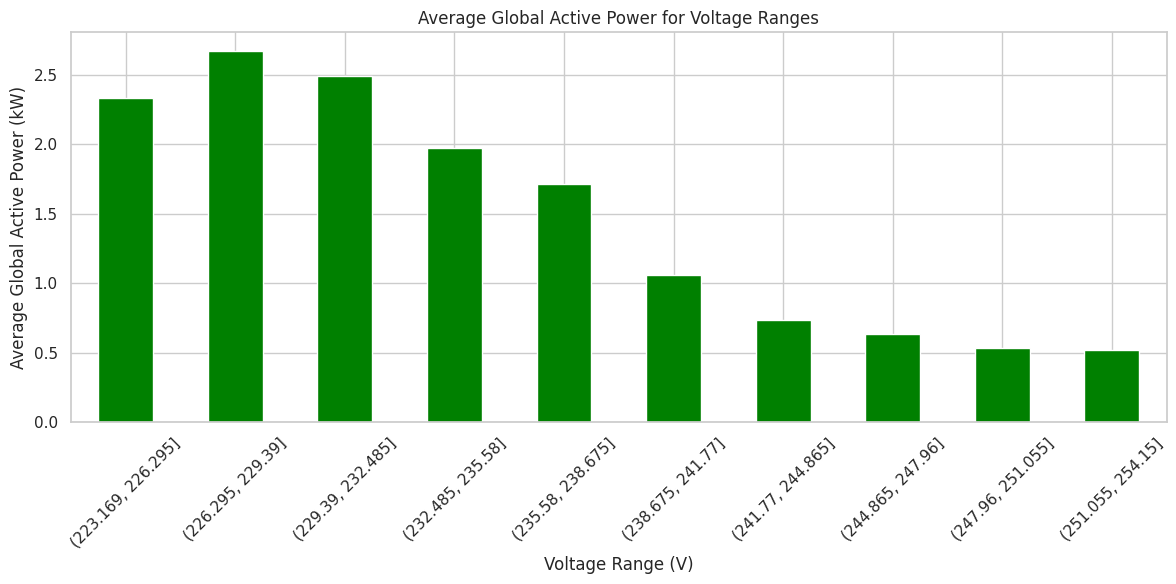

In [77]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
df['Voltage'] = pd.to_numeric(df['Voltage'])
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)
voltage_power_mean = df.groupby('Voltage_range')['Global_active_power'].mean()
plt.figure(figsize=(12, 6))
voltage_power_mean.plot(kind='bar', color='green')
plt.title('Average Global Active Power for Voltage Ranges')
plt.xlabel('Voltage Range (V)')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**OBSERVATION:**The bar chart shows that global active power usage changes with different voltage levels. Certain voltage ranges have higher power usage, possibly due to appliances that need more energy, while others show lower usage. These patterns can help understand how energy is used and identify areas for improved efficiency.

**Question2:** Generate a histogram to visualize the distribution of voltage consumption across different years?

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Voltage_range'],
      dtype='object')


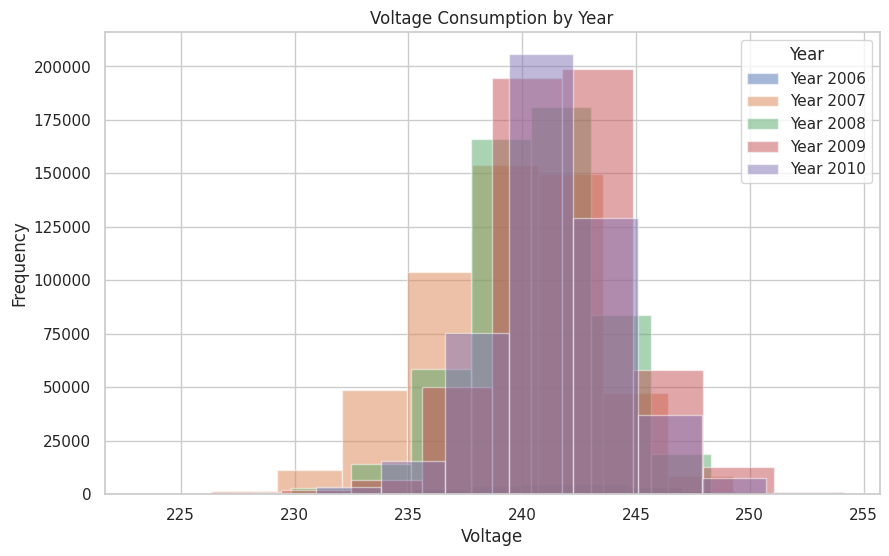

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip spaces from column names to avoid any extra spaces
df.columns = df.columns.str.strip()

# Check the columns and find the correct datetime column name
print(df.columns)

# Assuming the datetime column is named 'Datetime' (adjust this if needed)
if 'Datetime' in df.columns:
    # Convert 'Datetime' column to datetime format if it's not already
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    # Extract the year from the 'Datetime' column
    df['Year'] = df['Datetime'].dt.year

    # Plotting the histogram of Voltage based on the year
    plt.figure(figsize=(10, 6))

    # Loop over each unique year and plot the histogram
    for year in df['Year'].unique():
        plt.hist(df[df['Year'] == year]['Voltage'], bins=10, alpha=0.5, label=f'Year {year}')

    # Add labels and title
    plt.title('Voltage Consumption by Year')
    plt.xlabel('Voltage')
    plt.ylabel('Frequency')
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()
else:
    print("Datetime column not found in the dataset.")

**Observation:**The histogram provides insights into the distribution of voltage values across the dataset, highlighting the most common voltage ranges used in household energy consumption. This can indicate typical operating voltages and help identify any significant deviations or anomalies.








**Question3:**Generate a Kernel Density Estimate (KDE) plot for the Global_active_power column from the household energy consumption dataset?

<ipython-input-79-eba74a262a2a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Global_active_power'], label='Global Active Power', shade=True)


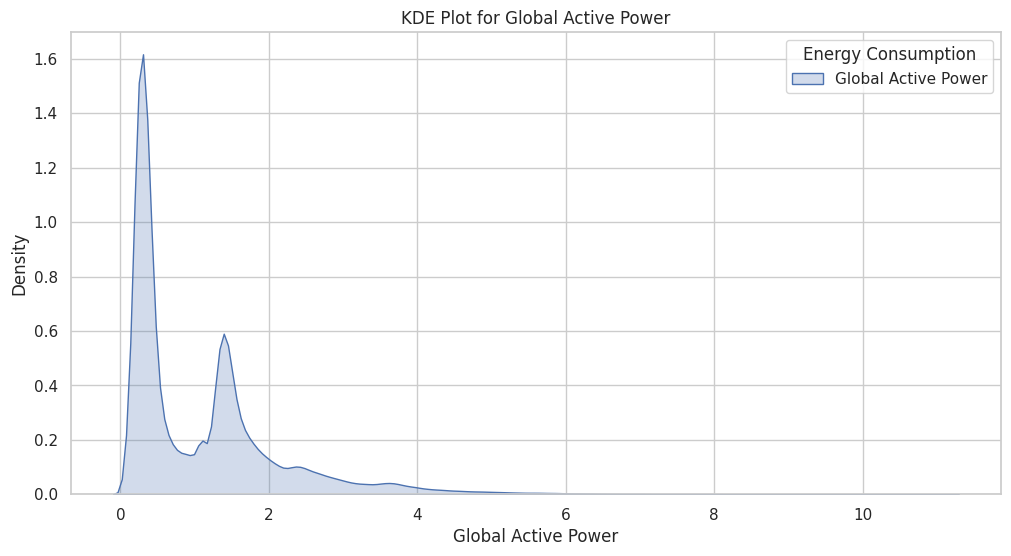

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Global_active_power'], label='Global Active Power', shade=True)
plt.title('KDE Plot for Global Active Power')
plt.xlabel('Global Active Power')
plt.ylabel('Density')
plt.legend(title='Energy Consumption')
plt.grid(True)
plt.show()

**Observation:**The KDE plot for Global_active_power provides a smooth visualization of the distribution of energy consumption, allowing us to observe the concentration of values, identify potential outliers, and understand the spread and central tendency. This helps in identifying the most common power usage, variability in consumption, and whether the data follows a normal or skewed distribution, which is essential for making informed decisions about further analysis or modeling.








**Question4:**Visualize the relationships and distributions among key variables in the energy consumption dataset?

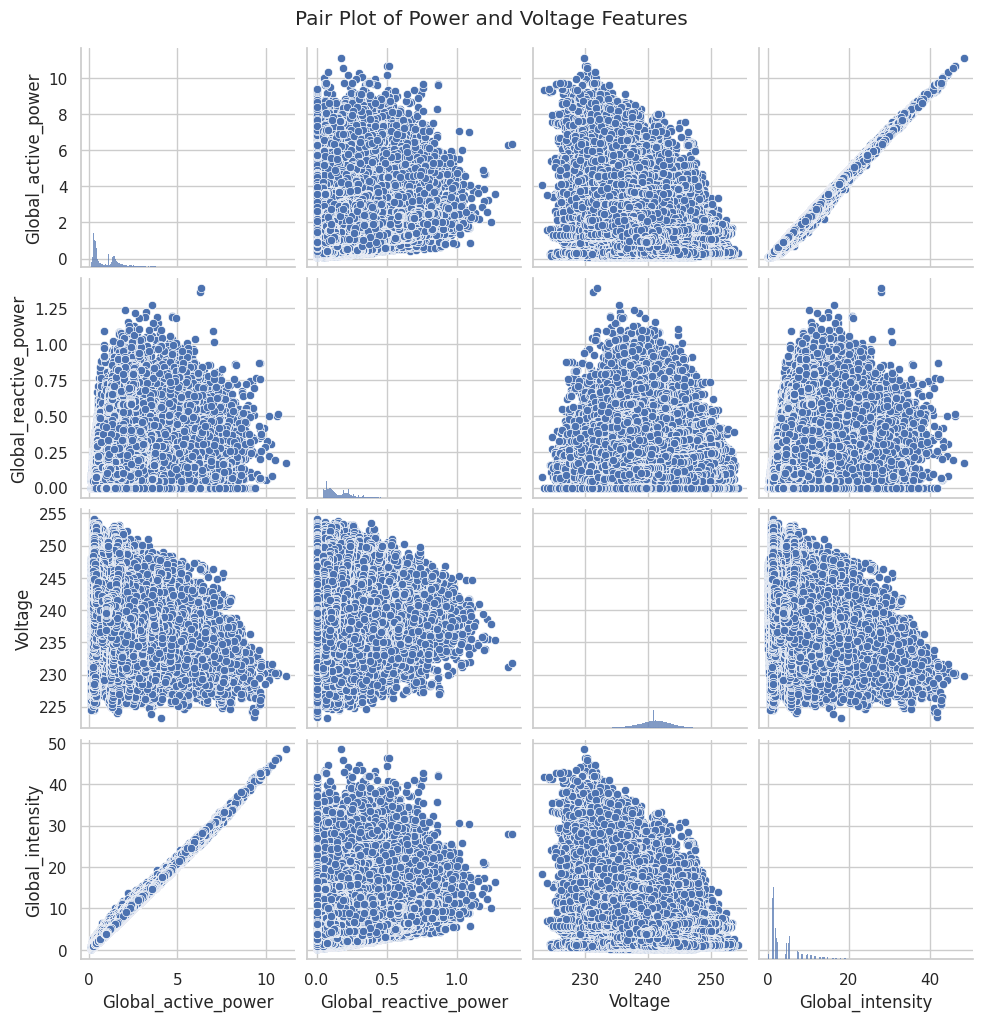

In [80]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[cols].dropna())
plt.suptitle('Pair Plot of Power and Voltage Features', y=1.02)
plt.show()

**Observation:**This pair plot will provide insights into the relationships between different measures of energy consumption and show any strong correlations or patterns between variables.








**Question5:**What is the trend in average global active power consumption per year, and how has it changed over the years in the energy consumption dataset?"








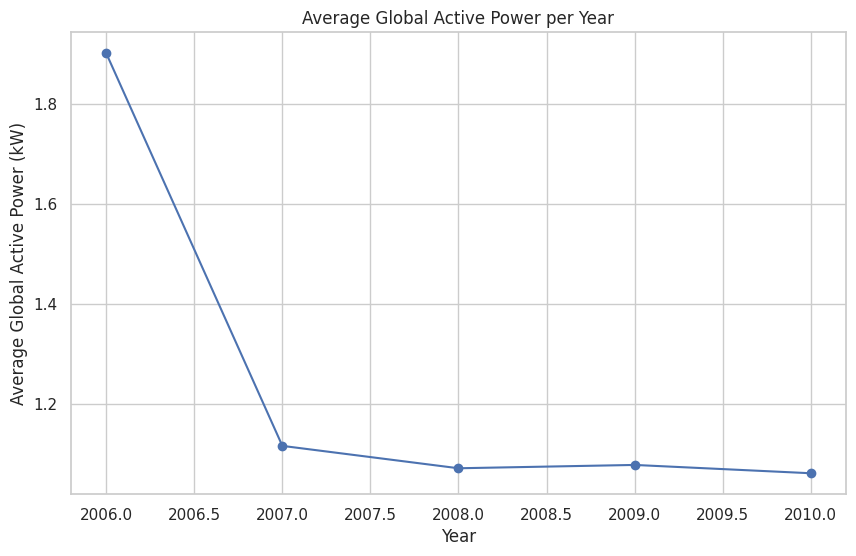

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your already loaded DataFrame

# Convert 'Global_active_power' to numeric type, handling errors by setting invalid parsing to NaN
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Group by 'Year' and calculate the mean of 'Global_active_power' for each year
yearly_avg_power = df.groupby('Year')['Global_active_power'].mean()

# Plot the yearly average global active power
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_power.index, yearly_avg_power.values, marker='o', color='b', linestyle='-')

# Customize the plot
plt.title('Average Global Active Power per Year')
plt.xlabel('Year')
plt.ylabel('Average Global Active Power (kW)')
plt.grid(True)

# Show the plot
plt.show()


**Observation:**The plot reveals whether the average global active power consumption has increased, decreased, or remained stable over the years, indicating potential changes in household energy usage patterns.








**Extract date and time components into tuples**

df['Date']: Extracts the year, month, and day from the Datetime column and stores it as a tuple (year, month, day).

df['Time']: Extracts the hour and minute from the Datetime column and stores it as a tuple (hour, minute).

In [82]:
df['Date'] = df['Datetime'].apply(lambda dt: (dt.year, dt.month, dt.day))
df['Time'] = df['Datetime'].apply(lambda dt: (dt.hour, dt.minute))
print(df[['Datetime', 'Date', 'Time']].head())

             Datetime            Date      Time
0 2006-12-16 17:24:00  (2006, 12, 16)  (17, 24)
1 2006-12-16 17:25:00  (2006, 12, 16)  (17, 25)
2 2006-12-16 17:26:00  (2006, 12, 16)  (17, 26)
3 2006-12-16 17:27:00  (2006, 12, 16)  (17, 27)
4 2006-12-16 17:28:00  (2006, 12, 16)  (17, 28)


**Installing Required Libraries**

In [83]:
!pip install holidays

* **Finding whether the day is a holiday or not**

* Function to check if the date is a holiday

* Convert the tuple to a date object

* Converting tuple (year, month, day) to date object

* Apply the function to the 'Date' column (which is in (year, month, day) format)

* Check the first few rows to verify the new column








In [84]:
import holidays
from datetime import date
holiday_list = holidays.India(years=[2006, 2007, 2008, 2009, 2010])

def check_if_holiday(date_tuple):
    holiday_date = date(*date_tuple)
    return 1 if holiday_date in holiday_list else 0

df['Holiday'] = df['Date'].apply(lambda x: check_if_holiday((x[0], x[1], x[2])))
print(df[['Datetime', 'Date', 'Holiday']])

                   Datetime            Date  Holiday
0       2006-12-16 17:24:00  (2006, 12, 16)        0
1       2006-12-16 17:25:00  (2006, 12, 16)        0
2       2006-12-16 17:26:00  (2006, 12, 16)        0
3       2006-12-16 17:27:00  (2006, 12, 16)        0
4       2006-12-16 17:28:00  (2006, 12, 16)        0
...                     ...             ...      ...
2075254 2010-11-26 20:58:00  (2010, 11, 26)        0
2075255 2010-11-26 20:59:00  (2010, 11, 26)        0
2075256 2010-11-26 21:00:00  (2010, 11, 26)        0
2075257 2010-11-26 21:01:00  (2010, 11, 26)        0
2075258 2010-11-26 21:02:00  (2010, 11, 26)        0

[2075259 rows x 3 columns]


**Observation:**New column created named 'holiday' , it contains 0 and 1 values

**Printing holidays and non holiday count**

In [85]:
# Count of holidays (1) and non-holidays (0)
holiday_counts = df['Holiday'].value_counts()

# Print the counts
print("Holiday counts:")
print(f"Holiday (1): {holiday_counts.get(1, 0)}")
print(f"Non-Holiday (0): {holiday_counts.get(0, 0)}")

Holiday counts:
Holiday (1): 105120
Non-Holiday (0): 1970139


**Observation :**

Almost 95% of days are Non-holidays and 5% of days are holidays

**Find if the there is sunlight during the time given in the dataset**

Extracting hour from the time tuple

Assuming 'time' is a tuple (hour, minute)

Sunlight is present between 06:00 and 18:00

Apply the function to the 'Time' column and create 'Sunlight' column

Print the first few rows to verify

In [86]:
def check_sunlight(time):
    hour = time[0]
    return 1 if 6 <= hour < 18 else 0

df['Sunlight'] = df['Time'].apply(check_sunlight)

print(df[['Datetime', 'Time', 'Sunlight']].head())


             Datetime      Time  Sunlight
0 2006-12-16 17:24:00  (17, 24)         1
1 2006-12-16 17:25:00  (17, 25)         1
2 2006-12-16 17:26:00  (17, 26)         1
3 2006-12-16 17:27:00  (17, 27)         1
4 2006-12-16 17:28:00  (17, 28)         1


**Observation :**

Sunlight column created with values 0 and 1

filters rows based on the "Sunlight" column, where rows with Sunlight == 1 are stored in sunlight_df, and rows with Sunlight == 0 are stored in

no_sunlight_df. It then displays the first few rows (including only Datetime, Time, and Sunlight columns) for each group.

In [87]:
sunlight_df = df[df['Sunlight'] == 1]
no_sunlight_df = df[df['Sunlight'] == 0]

print("Rows with Sunlight:")
print(sunlight_df[['Datetime', 'Time', 'Sunlight']].head())

print("\nRows with No Sunlight:")
print(no_sunlight_df[['Datetime', 'Time', 'Sunlight']].head())


Rows with Sunlight:
             Datetime      Time  Sunlight
0 2006-12-16 17:24:00  (17, 24)         1
1 2006-12-16 17:25:00  (17, 25)         1
2 2006-12-16 17:26:00  (17, 26)         1
3 2006-12-16 17:27:00  (17, 27)         1
4 2006-12-16 17:28:00  (17, 28)         1

Rows with No Sunlight:
              Datetime     Time  Sunlight
36 2006-12-16 18:00:00  (18, 0)         0
37 2006-12-16 18:01:00  (18, 1)         0
38 2006-12-16 18:02:00  (18, 2)         0
39 2006-12-16 18:03:00  (18, 3)         0
40 2006-12-16 18:04:00  (18, 4)         0


**Observation :**

This separates and displays data for times with and without sunlight, allowing easy comparison of these conditions

**Visualizing the Sunlight and Holidays Distribution**

This code generates two bar plots: one for the distribution of sunlight (Sunlight column) and one for holidays (Holiday column). Each plot showsthe count of occurrences for values 0 and 1, where 0 means "No Sunlight"/"Not Holiday," and 1 means "Sunlight"/"Holiday."

<ipython-input-88-a0086f0cfc6f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sunlight_counts.index, y=sunlight_counts.values, palette="Blues_d")


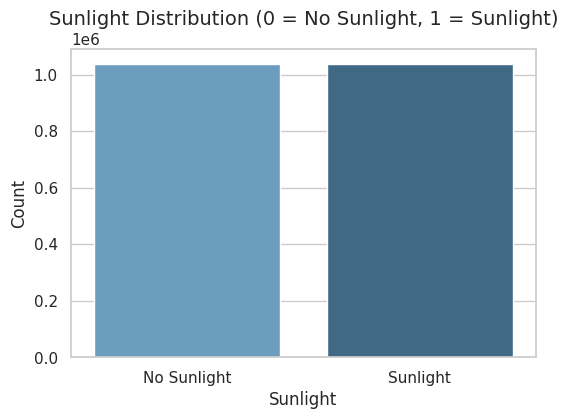

<ipython-input-88-a0086f0cfc6f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette="Greens_d")


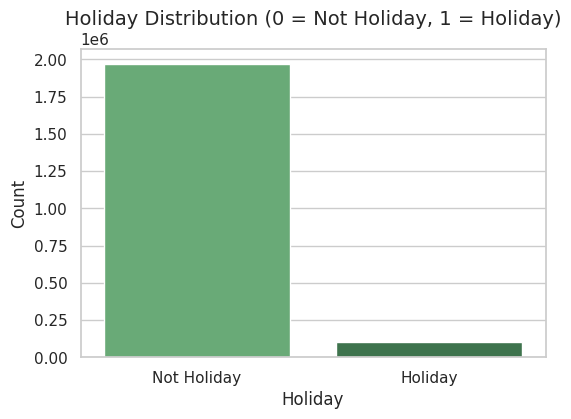

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Sunlight Distribution
plt.figure(figsize=(6, 4))
sunlight_counts = df['Sunlight'].value_counts()
sns.barplot(x=sunlight_counts.index, y=sunlight_counts.values, palette="Blues_d")
plt.title('Sunlight Distribution (0 = No Sunlight, 1 = Sunlight)', fontsize=14)
plt.xlabel('Sunlight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Sunlight', 'Sunlight'])
plt.show()

# Holiday Distribution
plt.figure(figsize=(6, 4))
holiday_counts = df['Holiday'].value_counts()
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette="Greens_d")
plt.title('Holiday Distribution (0 = Not Holiday, 1 = Holiday)', fontsize=14)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])
plt.show()

**Observations:**

Sunlight Distribution: Shows the number of instances with and without sunlight.

Holiday Distribution: Shows the number of days marked as holidays versus non-holidays.

# **MILESTONE-3**

**BASIC MACHINE LEARNING MODELS:**

* **Linear Regression**

* **Lasso Regression**

* **Ridge Regression**

* **Logistic Regression**


* **Splitting the original data into training and testing data to fit our model**


In [89]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df.drop(['Global_active_power', 'Datetime', 'Date', 'Time', 'Holiday', 'Sunlight'], axis=1)
y = df['Global_active_power']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Observation**

I observed that some columns have categorial data , so converting into numerical data as we need numerical data to fit into our model


**Convert categorical columns to numeric using one-hot encoding**

In [90]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

**Build and Evaluate Linear Regression model:**



In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
accuracy_threshold = 0.05  # 5% threshold
error_margin = np.abs((y_test - y_pred_linear) / y_test)  # relative error
accuracy = np.mean(error_margin <= accuracy_threshold) * 100  # percentage of predictions within threshold
print("Linear Regression:")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")
print(f"Accuracy: {accuracy:.2f}%")


Linear Regression:
RMSE: 0.04
R²: 1.00
Accuracy: 70.40%


* **The model has a very low RMSE of 0.04, indicating minimal prediction error.**

* **An R² of 1.00 means the model perfectly explains the variance in the target variable, though this may suggest overfitting.**

* **The accuracy of 70.40% indicates that 70.40% of predictions are within a 5% error margin, showing good performance but leaving room for improvement.**







**Build and Evaluate Lasso Regression model:**

In [93]:
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength (higher = stronger regularization)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
accuracy_threshold = 0.05  # 5% error threshold
error_margin = np.abs((y_test - y_pred_lasso) / y_test)  # relative error
accuracy_lasso = np.mean(error_margin <= accuracy_threshold) * 100  # percentage of predictions within threshold
print("Lasso Regression:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")
print(f"Accuracy: {accuracy_lasso:.2f}%")


Lasso Regression:
RMSE: 0.05
R²: 1.00
Accuracy: 64.05%


**OBSERVATION:**
* **The model has an RMSE of 0.05, indicating small prediction errors on average.**

* **An R² of 1.00 means the model perfectly explains the variance in the target variable, suggesting a perfect fit.**

* **The accuracy of 64.05% indicates that 64.05% of predictions are within a 5% error margin, showing decent performance but room for improvement.**







**Build and Evaluate Ridge Regression model:**


In [96]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization strength (higher = stronger regularization)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
accuracy_threshold = 0.05  # 5% error threshold
error_margin = np.abs((y_test - y_pred_ridge) / y_test)  # relative error
accuracy_ridge = np.mean(error_margin <= accuracy_threshold) * 100  # percentage of predictions within threshold
print("Ridge Regression:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")
print(f"Accuracy: {accuracy_ridge:.2f}%")


Ridge Regression:
RMSE: 0.04
R²: 1.00
Accuracy: 70.40%


**OBSERVATION:**
* **The model has an RMSE of 0.04, indicating very small average prediction errors.**

* **An R² of 1.00 means the model perfectly explains the variance in the target variable, suggesting a perfect fit to the data.**

* **The accuracy of 70.40% means that 70.40% of predictions fall within a 5% error margin of the true values, showing solid performance but still room for improvement.**







* "The key difference between the three models is that while Linear Regression has no regularization, leading to potential overfitting, both Lasso and Ridge Regression apply regularization (L1 for Lasso and L2 for Ridge) to reduce overfitting, with Lasso also performing feature selection by forcing some coefficients to zero, whereas Ridge shrinks all coefficients but doesn’t eliminate them."





* "All models have an R² of 1 likely because they perfectly fit the training data, which could indicate overfitting, especially if the test data is too similar or simple. In real-world scenarios, Ridge Regression is typically the best model due to its balance between regularization and fitting the data, helping to prevent overfitting while maintaining predictive accuracy.Based on the provided data, Linear Regression and Ridge Regression have the same RMSE and R² values, with Ridge Regression also achieving the highest accuracy of 70.40%. Therefore, Ridge Regression is the best model, as it balances regularization with model performance, reducing overfitting while maintaining accuracy."

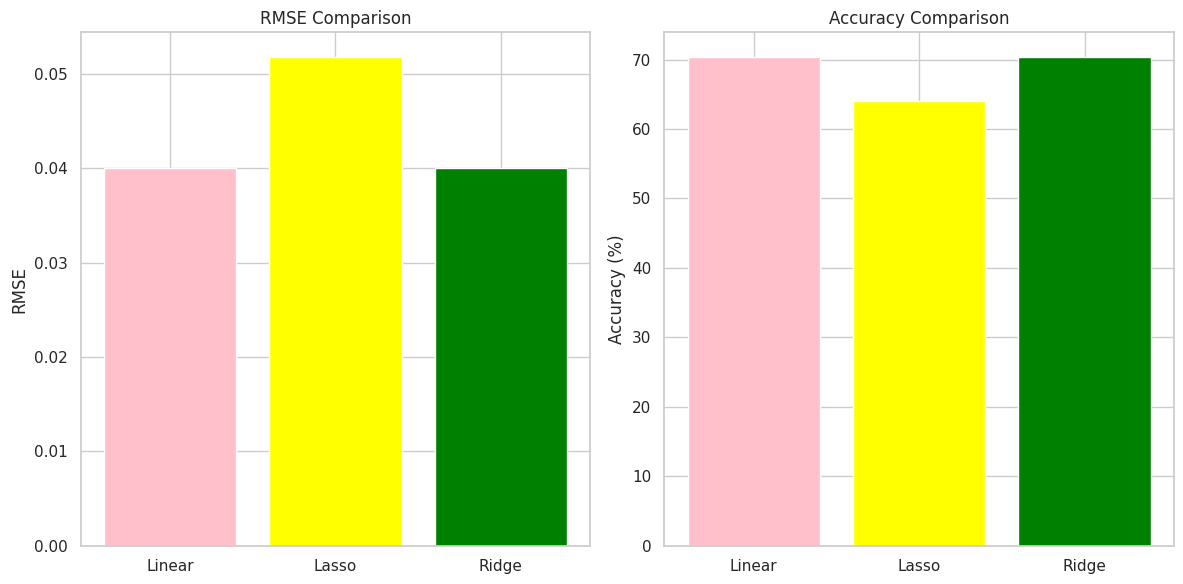

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['Linear', 'Lasso', 'Ridge'], [rmse_linear, rmse_lasso, rmse_ridge], color=['pink', 'yellow', 'green'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.subplot(1, 2, 2)
plt.bar(['Linear', 'Lasso', 'Ridge'], [accuracy, accuracy_lasso, accuracy_ridge], color=['pink', 'yellow', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.tight_layout()
plt.show()


* **Ridge Regression performs best with low RMSE and high accuracy, while Lasso Regression shows slightly higher RMSE and lower accuracy.**








**Why certain models have good accuracy and others don't?**
* **Regularization:** Models like Ridge and Lasso use regularization, which helps prevent overfitting, leading to better generalization and higher accuracy compared to Linear Regression, which may overfit on the training data.

* **Feature Selection (Lasso):**Lasso Regression performs feature selection by shrinking some coefficients to zero, which might result in lower accuracy if relevant features are removed, while Ridge maintains all features with reduced magnitude, improving accuracy.


* **Model Complexity:** Models with higher complexity or no regularization, like Linear Regression, might capture noise in the data, leading to lower accuracy, whereas regularized models like Ridge tend to balance complexity and fit better, yielding higher accuracy.